In [6]:
import cv2,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from pathlib import Path 
from image_cutter import *
from data.create_lmdb_dataset import *
import hashlib
import random
plt.style.use('dark_background')
%matplotlib inline

In [2]:
paths=[str(p) for p in Path('data/tabs').glob('**/*.png')]
print(f'Found {len(paths)} tabs')

Found 19 tabs


data/tabs/unknown (13).png cfd875e519
0
data/tabs/unknown (1).png c65e9778f2
0
data/tabs/unknown (12).png 91ea01eec5
0


/Users/swozny/work/poe/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


data/tabs/unknown (15).png 4ef3b6dd3f
0
data/tabs/unknown (7).png 4921f9f30b
0
data/tabs/unknown.png 737787374c
0
data/tabs/unknown (6).png a10ae78a87
0
data/tabs/unknown (14).png de03754ebf
0
data/tabs/unknown (5).png e2d5e1294b
0
data/tabs/unknown (9).png 8d767f20e7
0
data/tabs/unknown (8).png b16ca26d62
0
data/tabs/unknown1.png 88ee7e5dd4
0
data/tabs/unknown3.png 95d663aff7
0
data/tabs/unknown (16).png 9c0256e2ef
0
data/tabs/unknown (4).png 9f62b27627
0
data/tabs/unknown (3).png b374d8f4a0
0
data/tabs/unknown (11).png 59bc08bf84
0
data/tabs/unknown (10).png 82659fc57c
0
data/tabs/unknown (2).png 9cc24b205f
0


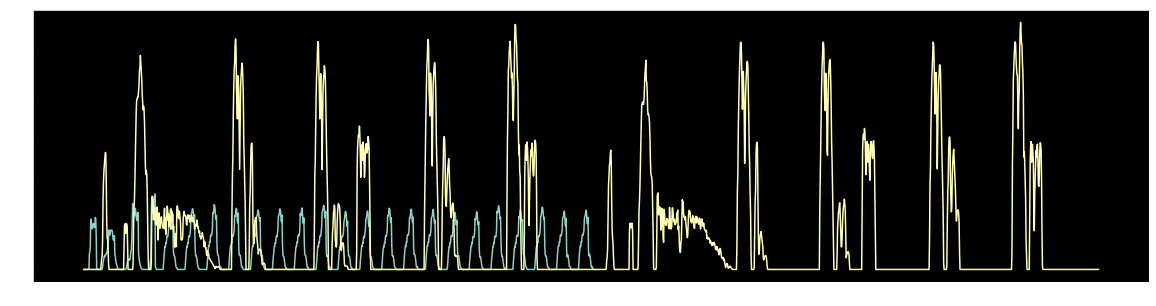

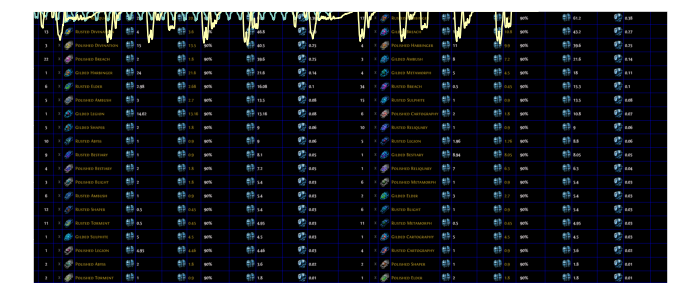

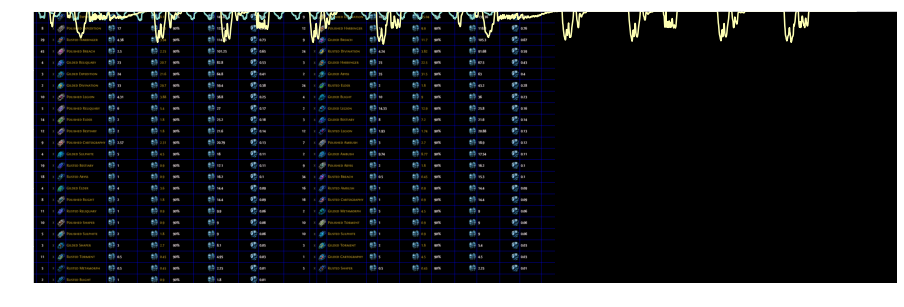

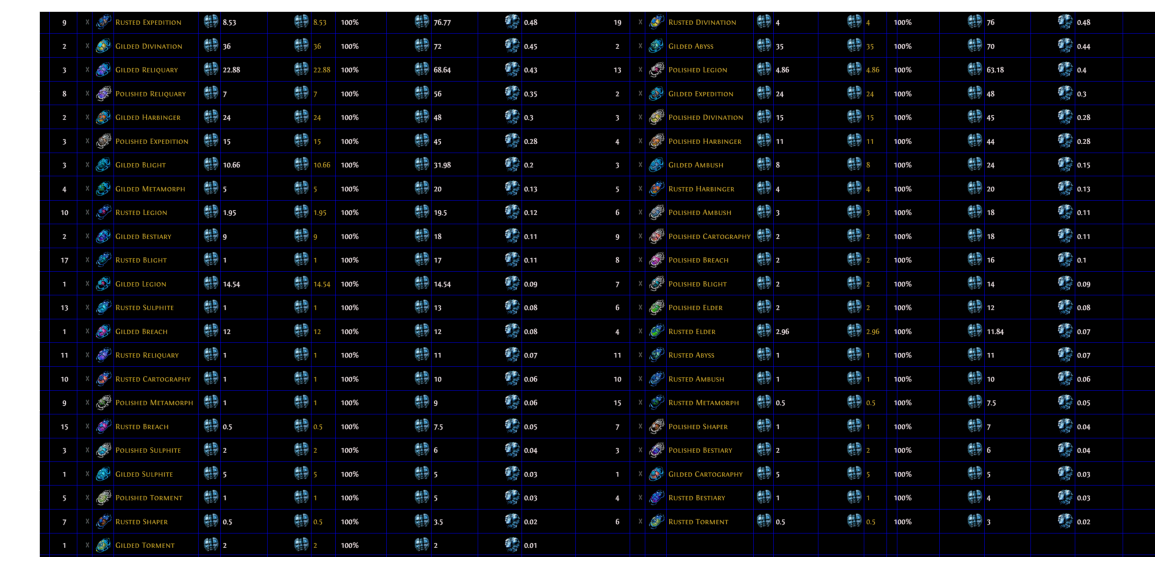

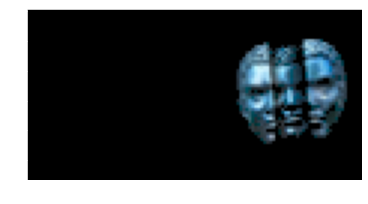

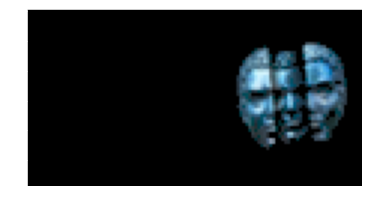

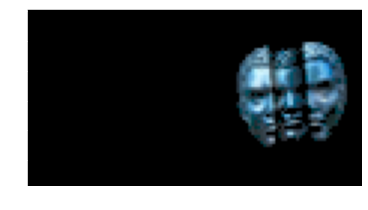

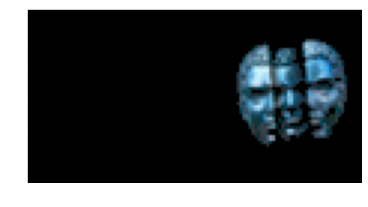

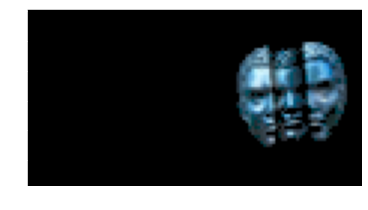

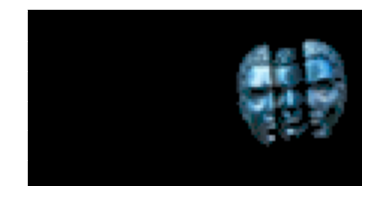

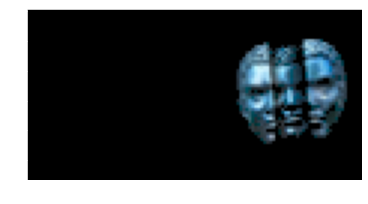

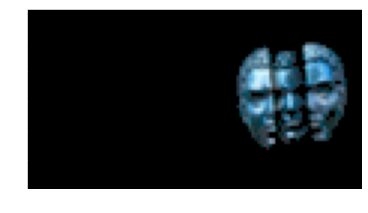

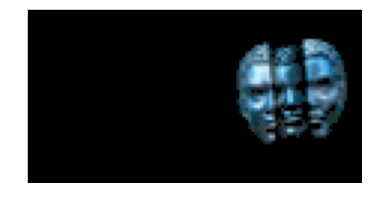

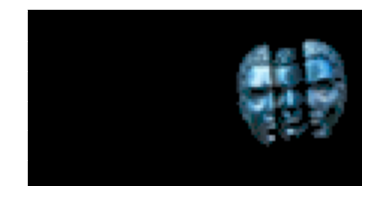

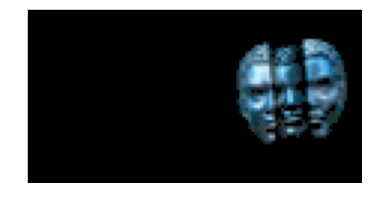

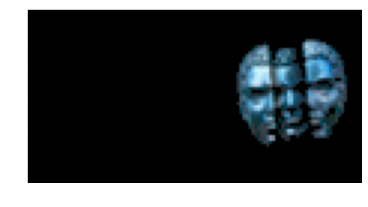

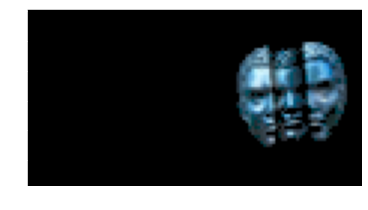

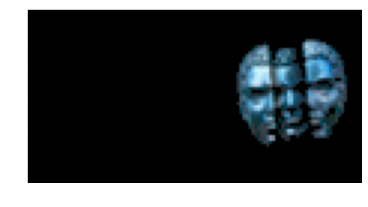

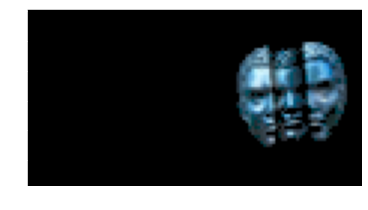

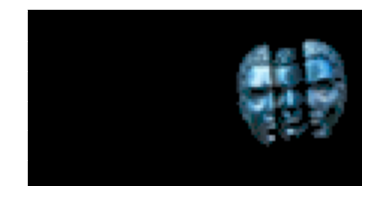

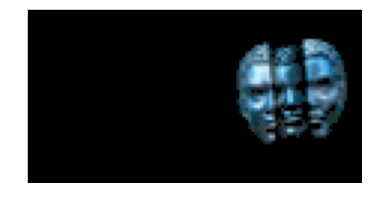

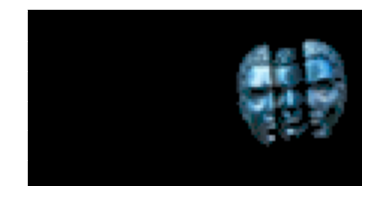

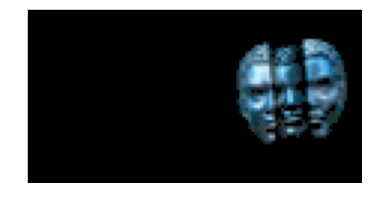

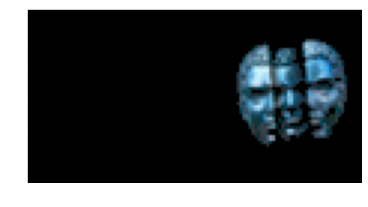

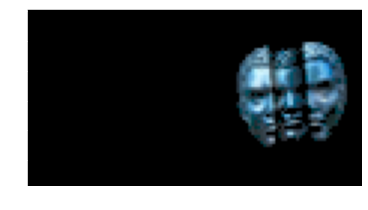

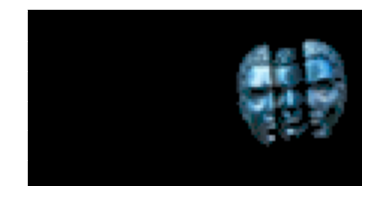

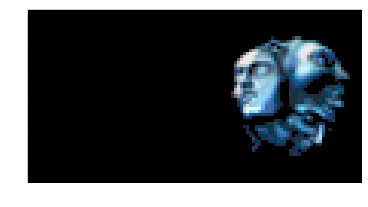

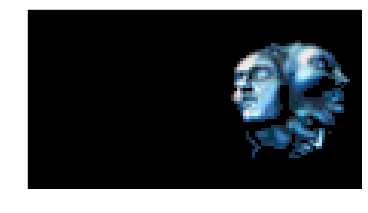

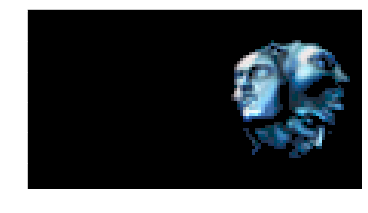

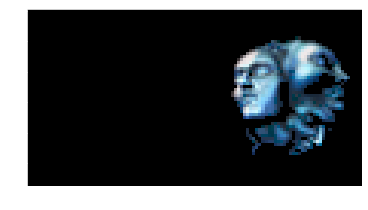

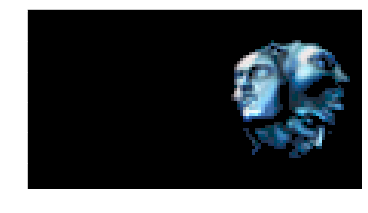

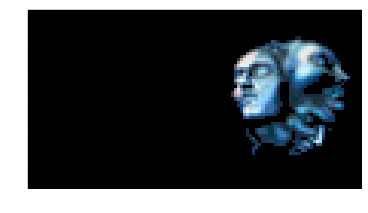

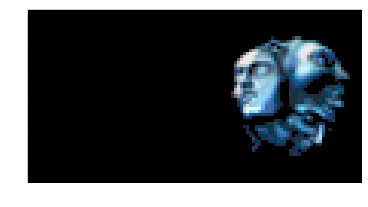

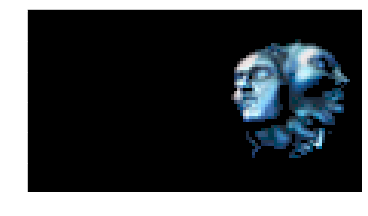

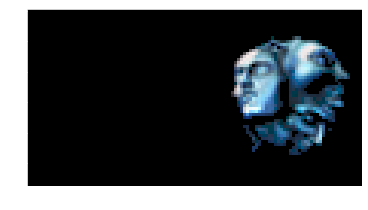

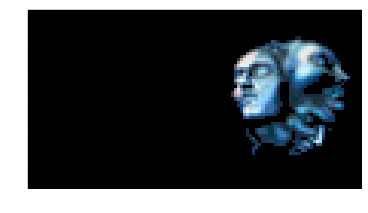

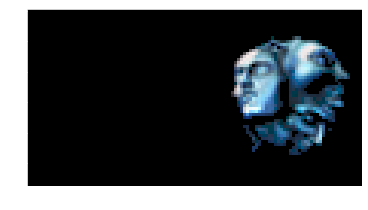

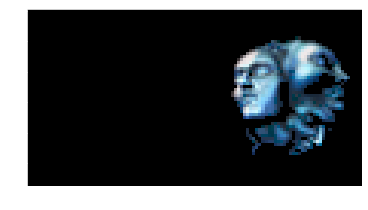

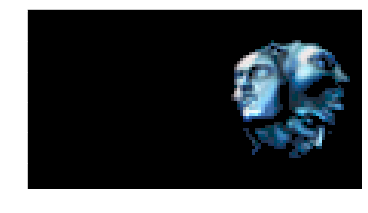

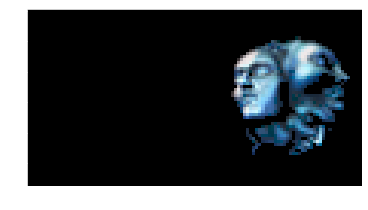

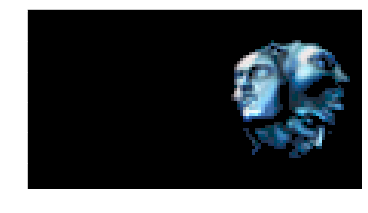

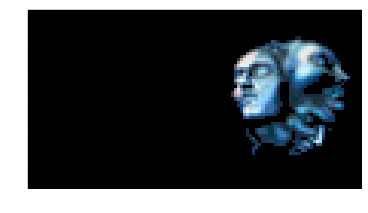

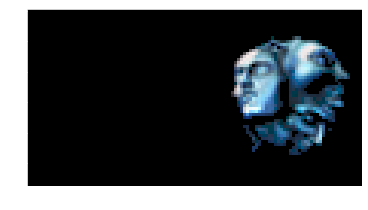

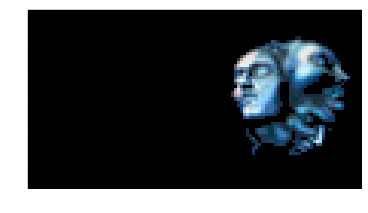

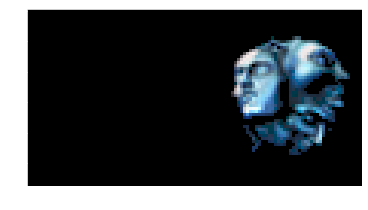

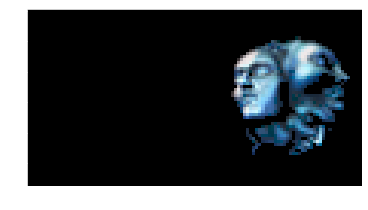

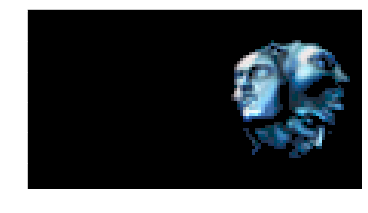

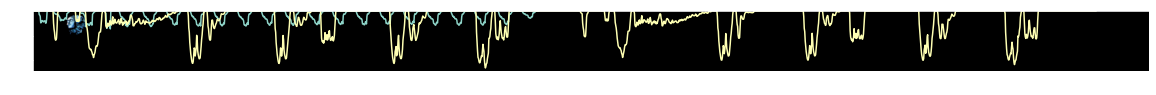

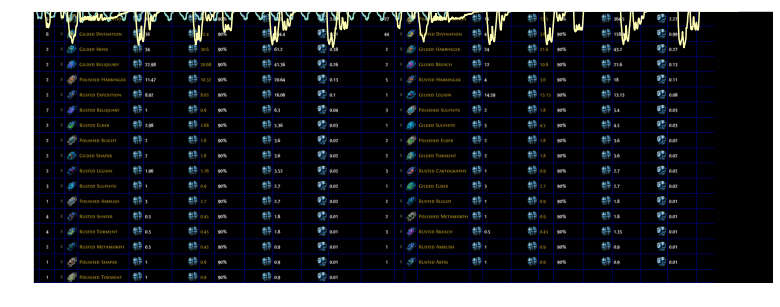

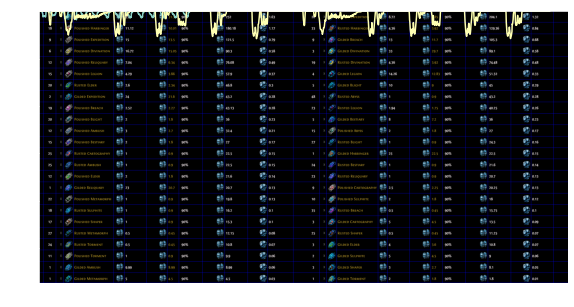

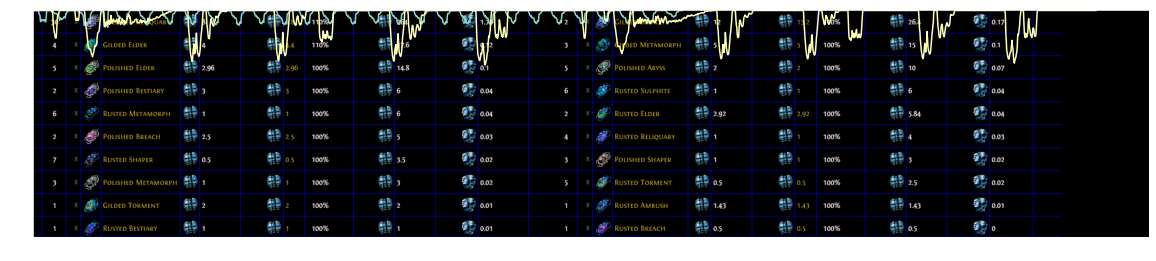

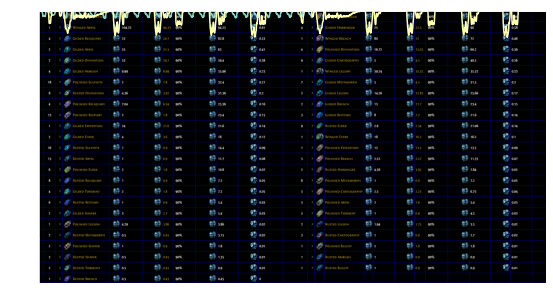

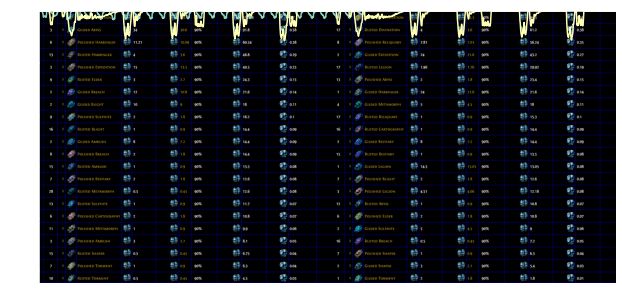

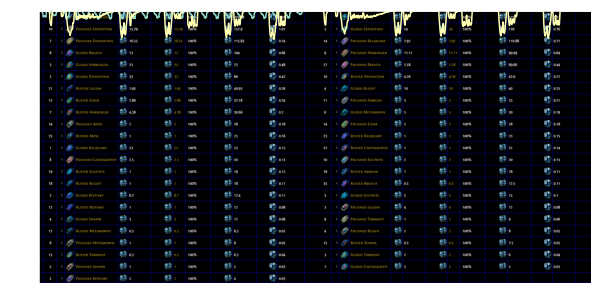

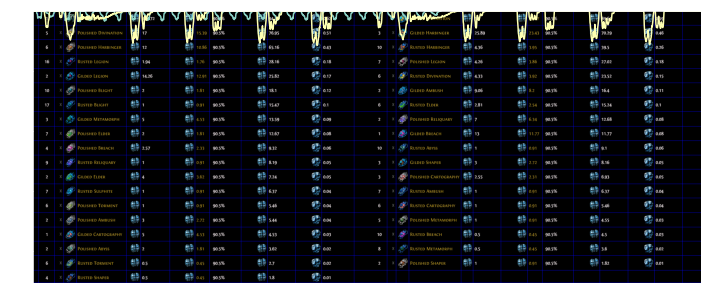

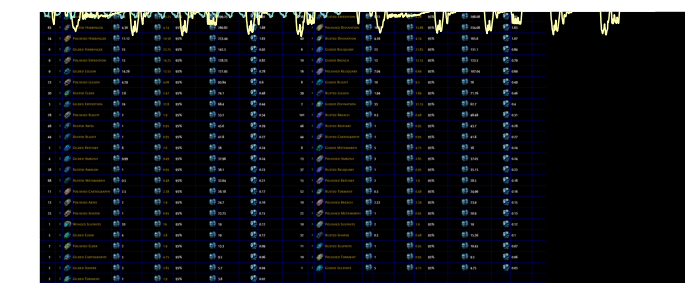

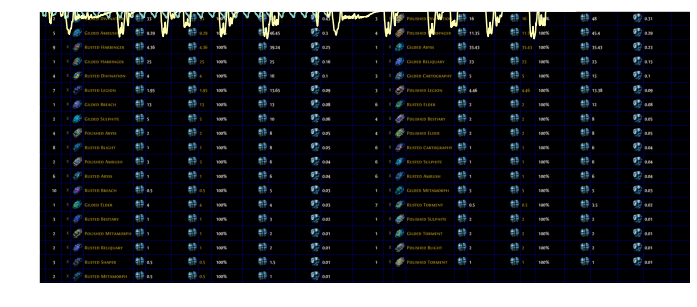

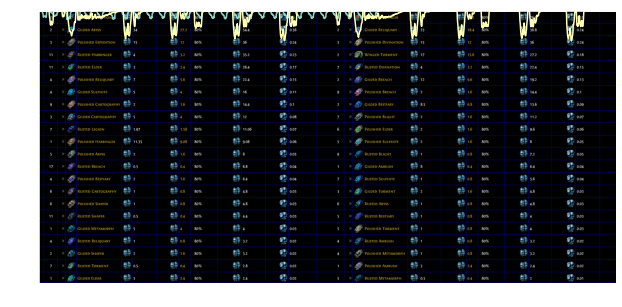

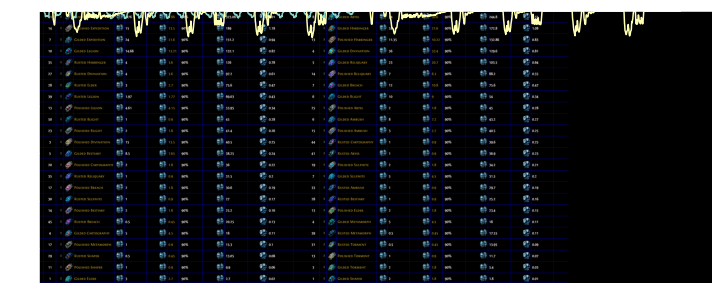

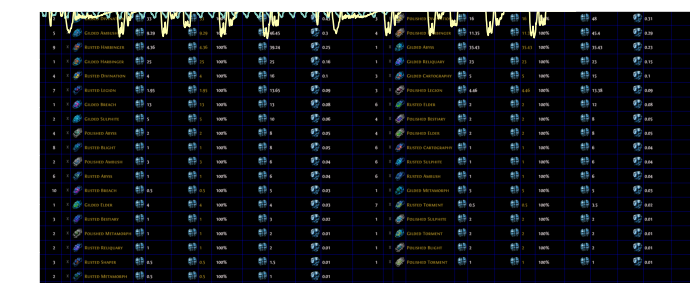

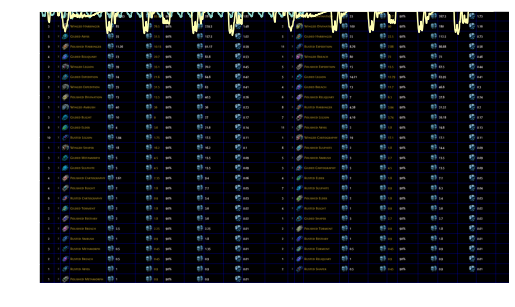

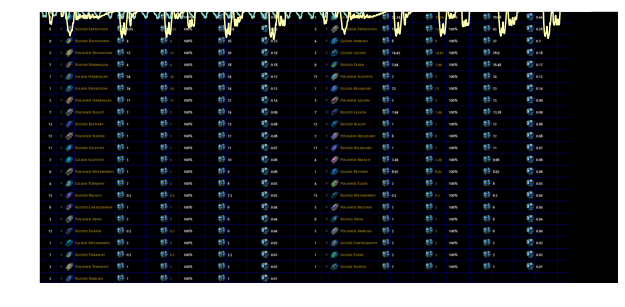

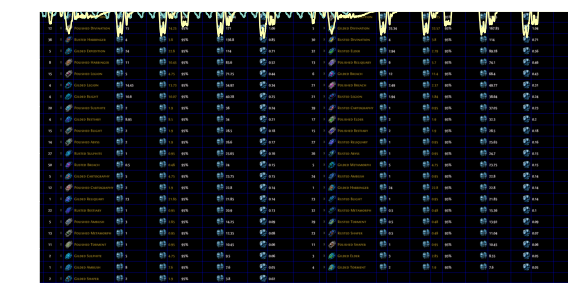

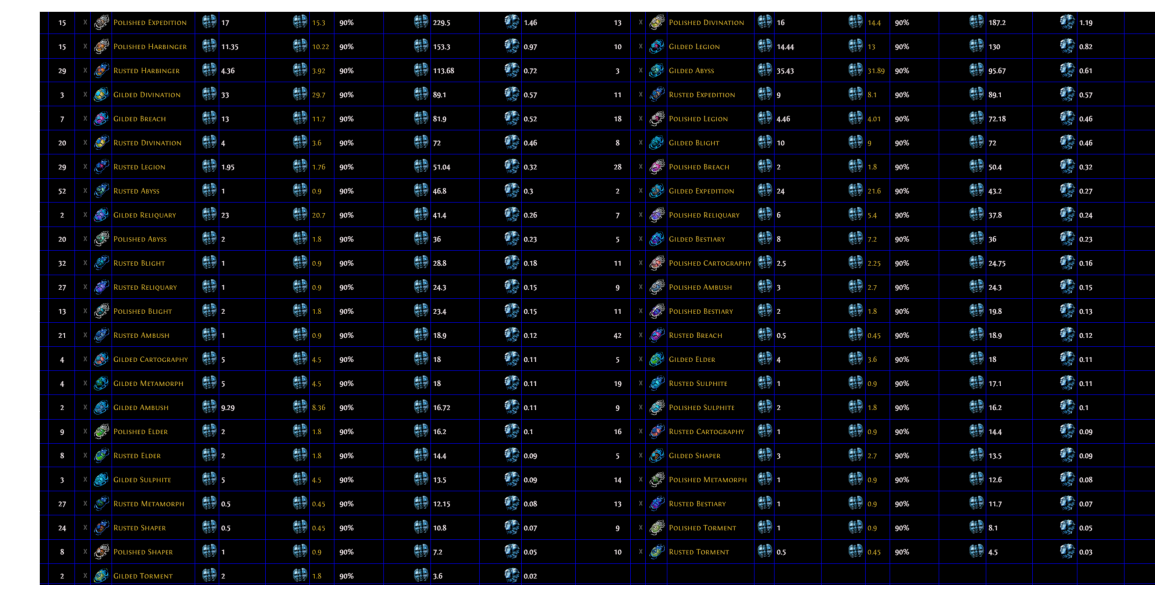

In [4]:
cols_of_interest=[1,6,8,11,13,14,19,21,24,26]
for path in paths:
    img_hash=hashlib.sha224(str(path).encode()).hexdigest()[:10]
    print(path,img_hash)
    img=cv2.imread(path)

    try:
        frags=cut_image_to_frags(img)
    except Exception as e: 
        print(f'{path,img_hash} could not be processed:{e}')
        plt.figure(figsize=(20,20))
        plt.imshow(img)
        raise
        continue
    for col in cols_of_interest:
        for row,frag in enumerate(frags[col]):
            root=f'data/handlabeling/{img_hash}'
            os.makedirs(root,exist_ok=True)
            try:
                _frag=normalize_frag(frag,target=(32,80))
                cv2.imwrite(f'{root}/{col}_{row}.png',_frag)
            except:
                plt.figure()
                plt.imshow(frag)
            

In [7]:
input('Continue?')
handlabels='data/handlabeled.txt'
data_valid_txt = 'data/valid.txt'
data_train_txt = 'data/train.txt'
with open(handlabels) as f:
    all_lines=f.readlines()
random.shuffle(all_lines)
split=int(len(all_lines)/10)
with open(data_train_txt,'w') as f:
    f.writelines(all_lines[split:])
with open(data_valid_txt,'w') as f:
    f.writelines(all_lines[:split])

createDataset('.', data_valid_txt, 'data/valid')
createDataset('.', data_train_txt, 'data/train')


Created dataset with 110 samples
Created dataset with 997 samples
